In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
dqn_data = pd.read_csv("dqn_basic_env_1566071007/monitor.csv", header=1)
a2c_data = pd.read_csv("a2c_basic_env_1566057291/monitor.csv", header=1,error_bad_lines=False)
a2c_data['r'][a2c_data.r>0.93] = 0.93 #bad entry
acer_data = pd.read_csv("acer_basic_env_1566057514/monitor.csv", header=1,error_bad_lines=False)
acer_data['r'][acer_data.r>0.93] = 0.93
acktr_data = pd.read_csv("acktr_basic_env_1566179747/monitor.csv", header=4,error_bad_lines=False)
acktr_data.columns = ['r','l','t']
acktr_data['r'][acktr_data.r>0.93] = 0.93
ppo_data = pd.read_csv("ppo_basic_env_1566056370/monitor.csv", header=1,error_bad_lines=False)
ppo_data['r'][ppo_data.r>0.93] =0.93
trpo_data = pd.read_csv("trpo_basic_env_1566070590/monitor.csv", header=1)

b'Skipping line 135: expected 3 fields, saw 15\nSkipping line 172: expected 3 fields, saw 5\nSkipping line 199: expected 3 fields, saw 11\nSkipping line 201: expected 3 fields, saw 9\n'
b'Skipping line 5: expected 3 fields, saw 5\nSkipping line 8: expected 3 fields, saw 11\nSkipping line 15: expected 3 fields, saw 5\nSkipping line 16: expected 3 fields, saw 9\nSkipping line 17: expected 3 fields, saw 5\nSkipping line 21: expected 3 fields, saw 5\nSkipping line 54: expected 3 fields, saw 5\nSkipping line 56: expected 3 fields, saw 8\nSkipping line 58: expected 3 fields, saw 5\nSkipping line 63: expected 3 fields, saw 9\nSkipping line 70: expected 3 fields, saw 5\nSkipping line 145: expected 3 fields, saw 6\nSkipping line 147: expected 3 fields, saw 4\nSkipping line 156: expected 3 fields, saw 5\nSkipping line 165: expected 3 fields, saw 5\nSkipping line 195: expected 3 fields, saw 7\nSkipping line 196: expected 3 fields, saw 14\nSkipping line 198: expected 3 fields, saw 5\nSkipping line

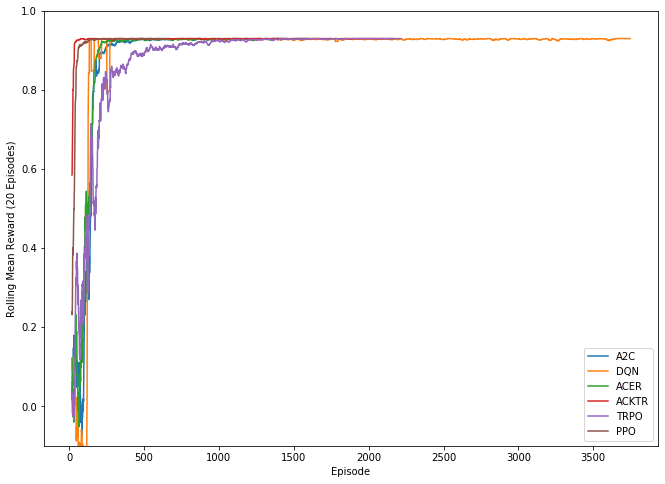

In [126]:
plt.plot(a2c_data.index.values, a2c_data.r.rolling(20).mean(),label='A2C')
plt.plot(dqn_data.index.values, dqn_data.r.rolling(20).mean(),label='DQN')
plt.plot(acer_data.index.values, acer_data.r.rolling(20).mean(),label='ACER')
plt.plot(acktr_data.index.values, acktr_data.r.rolling(20).mean(),label='ACKTR')
plt.plot(trpo_data.index.values, trpo_data.r.rolling(20).mean(),label='TRPO')
plt.plot(ppo_data.index.values, ppo_data.r.rolling(20).mean(),label='PPO')
fig = plt.gcf()
plt.legend(loc='lower right')
fig.set_size_inches(11,8) 
plt.ylabel('Rolling Mean Reward (20 Episodes)')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()

In [133]:
#ray results
ray_dqn = pd.read_csv("ray/DQN_unity_env_0_2019-08-24_11-03-376lp088bk/progress.csv", header=0)
ray_a3c = pd.read_csv("ray/A3C_unity_env_0_2019-08-24_11-12-1670_l0svv/progress.csv", header=0)
ray_impala = pd.read_csv("ray/IMPALA_unity_env_0_2019-08-25_09-36-187tmy2cxb/progress.csv", header=0)
ray_pg = pd.read_csv("ray/PG_unity_env_0_2019-08-24_18-39-457d0x847f/progress.csv", header=0)
ray_ppo = pd.read_csv("ray/PPO_unity_env_0_2019-08-24_10-55-47equ1pzwm/progress.csv", header=0)
#ray_ppo
#/home/jim/projects/unity_ray/stable_results/basic_solved/ray/PPO_unity_env_0_2019-08-24_10-55-47equ1pzwm/progress.csv
#/home/jim/projects/unity_ray/stable_results/basic_solved/ray/PG_unity_env_0_2019-08-24_18-39-457d0x847f/progress.csv
#/home/jim/projects/unity_ray/stable_results/basic_solved/ray/IMPALA_unity_env_0_2019-08-25_09-36-187tmy2cxb/progress.csv
#/home/jim/projects/unity_ray/stable_results/basic_solved/ray/A3C_unity_env_0_2019-08-24_11-12-1670_l0svv/progress.csv
#/home/jim/projects/unity_ray/stable_results/basic_solved/ray/DQN_unity_env_0_2019-08-24_11-03-376lp088bk/progress.csv

In [134]:
#episode_reward_mean
#timesteps_total
#episodes_total
#ray_dqn.columns

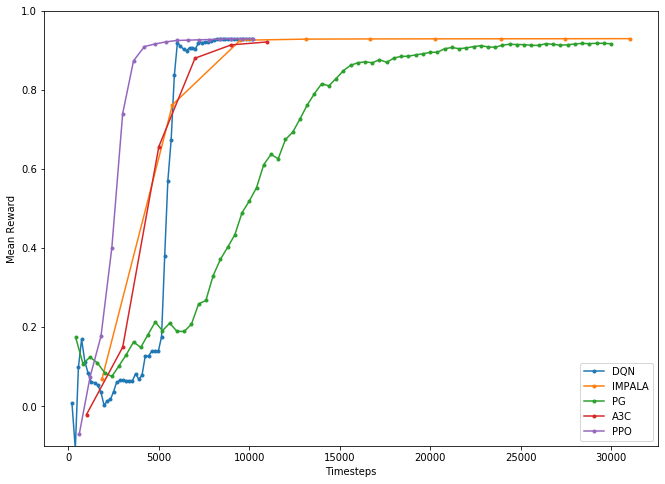

In [135]:
plt.plot(ray_dqn.timesteps_total, ray_dqn.episode_reward_mean,label='DQN',marker='.')
plt.plot(ray_impala.timesteps_total, ray_impala.episode_reward_mean,label='IMPALA',marker='.')
plt.plot(ray_pg.timesteps_total, ray_pg.episode_reward_mean,label='PG',marker='.')
plt.plot(ray_a3c.timesteps_total, ray_a3c.episode_reward_mean,label='A3C',marker='.')
plt.plot(ray_ppo.timesteps_total, ray_ppo.episode_reward_mean,label='PPO',marker='.')
fig = plt.gcf()
plt.legend(loc='lower right')
fig.set_size_inches(11,8) 
plt.ylabel('Mean Reward')
plt.xlabel('Timesteps')
plt.ylim((-.1,1))
plt.show()

In [121]:
plt.plot(a2c_data.index.values, a2c_data.r.rolling(20).mean(), 
         trpo_data.index.values, trpo_data.r.rolling(20).mean(),
        dqn_data.index.values, dqn_data.r.rolling(20).mean(),
        ppo_data.index.values, ppo_data.r.rolling(20).mean(),
        acer_data.index.values, acer_data.r.rolling(20).mean(),
        acktr_data.index.values, acktr_data.r.rolling(20).mean(), lw=2.3)
fig = plt.gcf()

fig.set_size_inches(11,8) 
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-121-d8ecefb2f7be>, line 2)

/home/jim/anaconda3/envs/unity_ray/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
#len(a2c_data['r'][a2c_data.r>0.93])
#len(acer_data['r'][acer_data.r>0.93])
#acer_data['r'][acer_data.r>0.93] = 0.93
#acktr_data
#len(acktr_data['r'][acktr_data.r>0.93])
#acktr_data['r'][acktr_data.r>0.93] = 0.93
#len(ppo_data['r'][ppo_data.r>0.93])
ppo_data['r'][ppo_data.r>0.93] =0.93

In [96]:
acktr_data['r'][acktr_data.r>0.93]

2159    2.01033
Name: r, dtype: float64

In [94]:
acktr_data

,r,l,t
0,0.82000,18.0,3.743588
1,-0.01000,101.0,4.089992
2,0.02000,8.0,4.114504
3,0.66000,34.0,4.235106
4,0.06000,4.0,4.249508
5,0.61000,39.0,4.384815
6,-0.05000,15.0,4.440493
7,0.91000,9.0,4.470570
8,0.81000,19.0,4.536082
9,0.01000,9.0,4.573808


In [90]:
dqn_data

,r,l,t
0,-0.04,14,0.776199
1,0.02,8,0.794802
2,0.06,4,0.806420
3,-0.11,21,0.855056
4,-0.83,93,1.090245
5,-0.15,25,1.149970
6,0.36,64,1.292052
7,-0.06,16,1.330485
8,0.00,10,1.355614
9,0.02,8,1.375306


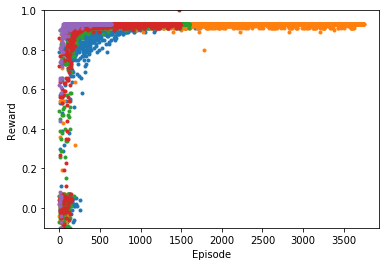

In [41]:
plt.plot(trpo_data.r,'.',dqn_data.r,'.',a2c_data.r,'.',acer_data.r,'.',ppo_data.r,'.')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()

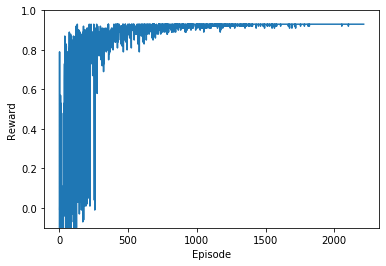

In [56]:
plt.plot(trpo_data.index.values, trpo_data.r,dqn)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()

In [55]:
trpo_data.index.values

array([   0,    1,    2, ..., 2212, 2213, 2214])

In [62]:
dqn_data['r'].cumsum()
#data['column'].rolling(5).mean()
data['r'].rolling(5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4      -0.18
        ... 
3741    0.93
3742    0.93
3743    0.93
3744    0.93
3745    0.93
Name: r, Length: 3746, dtype: float64

In [70]:
trpo_data.r

0      -0.30
1      -0.13
2       0.79
3      -0.01
4       0.06
        ... 
2210    0.93
2211    0.93
2212    0.93
2213    0.93
2214    0.93
Name: r, Length: 2215, dtype: float64

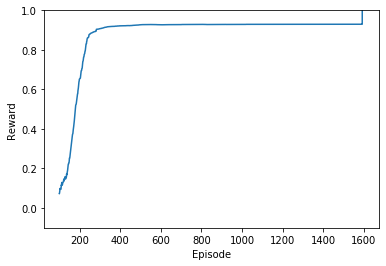

In [66]:
plt.plot(a2c_data.index.values, a2c_data.r.rolling(100).mean(), 
         trpo_data.index.values, trpo_data.r.rolling(100).mean() )
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()

In [ ]:
#,acktr_data.r,'.'

In [71]:
a2c_data.r

0       0.49
1      -0.07
2       0.06
3       0.00
4       0.45
        ... 
1596    0.92
1597    0.93
1598    0.93
1599    0.91
1600    0.93
Name: r, Length: 1601, dtype: float64

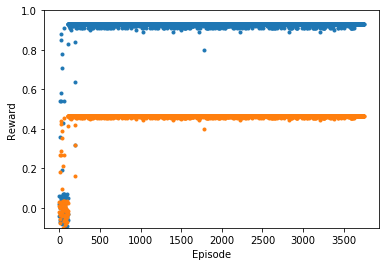

In [20]:
plt.plot(dqn_data.r,'.')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.ylim((-.1,1))
plt.show()